In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

- Unlabelled Data : Data which dors not content `Dependent Variable`

In [105]:
hr_data = pd.read_csv('HR_comma_sep.csv')
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [106]:
X = hr_data.drop(columns='left')
y = hr_data['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14990    1
14991    1
14992    1
14993    1
14994    1
Name: left, Length: 14995, dtype: int64

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24,test_size=0.3, stratify=y)

In [109]:
ohe = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore').set_output(transform='pandas')

ct = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(categories=[['technical', 'hr', 'sales', 'support', 'management', 'marketing',
                                        'RandD', 'product_mng', 'IT', 'accounting']]),['Department']),
    ('tnf2',OneHotEncoder(categories=[['medium', 'high', 'low']]),['salary'])
],remainder='passthrough')

In [110]:
ct.fit_transform(X_train)

array([[1., 0., 0., ..., 2., 1., 0.],
       [0., 1., 0., ..., 4., 0., 0.],
       [0., 0., 1., ..., 3., 0., 0.],
       ...,
       [0., 0., 1., ..., 8., 0., 0.],
       [0., 0., 1., ..., 2., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.]])

In [111]:
ct.fit(X_test)

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(categories=[['technical', 'hr',
                                                            'sales', 'support',
                                                            'management',
                                                            'marketing',
                                                            'RandD',
                                                            'product_mng', 'IT',
                                                            'accounting']]),
                                 ['Department']),
                                ('tnf2',
                                 OneHotEncoder(categories=[['medium', 'high',
                                                            'low']]),
                                 ['salary'])])

In [112]:
log = LogisticRegression(random_state=24)

In [113]:
kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)
pipe = Pipeline([('CT',ct),('LOG',log)])
# they are parameters of Logistic Regression class so used 
params = {
    'LOG__solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
    'LOG__multi_class':['ovr','multinominal'],
    'LOG__C':np.linspace(0.001,10,20)
}
gcv = GridSearchCV(pipe, param_grid=params,cv=kfold, scoring='f1_micro')   # scoring for finding f1 ratio
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'LOG__C': np.float64(6.316157894736842), 'LOG__multi_class': 'ovr', 'LOG__solver': 'lbfgs'}
0.793731243747916


In [114]:
# Inferencing

In [115]:
tst = pd.read_csv('tst_hr.csv')

In [116]:
best_model = gcv.best_estimator_

In [117]:
print(best_model.predict(tst))
print(best_model.predict_proba(tst))   # here two column which indicate the probability of 0 and 1 respectively

[1 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
[[0.46079548 0.53920452]
 [0.76856178 0.23143822]
 [0.45771735 0.54228265]
 [0.50977763 0.49022237]
 [0.85938071 0.14061929]
 [0.99484564 0.00515436]
 [0.37085956 0.62914044]
 [0.59373881 0.40626119]
 [0.89572738 0.10427262]
 [0.94296646 0.05703354]
 [0.95771686 0.04228314]
 [0.8569249  0.1430751 ]
 [0.79284595 0.20715405]
 [0.96234687 0.03765313]
 [0.86888895 0.13111105]]


In [123]:
# from sklearn.metrics import classification_report
# classification_report(y_test,y_pred)

# ROC & AUC

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24,test_size=0.3, stratify=y)

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score

In [124]:
ohe = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore').set_output(transform='pandas')

ct = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(categories=[['technical', 'hr', 'sales', 'support', 'management', 'marketing',
                                        'RandD', 'product_mng', 'IT', 'accounting']]),['Department']),
    ('tnf2',OneHotEncoder(categories=[['medium', 'high', 'low']]),['salary'])
],remainder='passthrough')

In [127]:
kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)
pipe = Pipeline([('CT',ct),('LOG',log)])
lr = LogisticRegression(random_state=24)
pipe.fit(X_train,y_train)
y_pred_prob = pipe.predict_proba(X_test)
p_y_1 =  y_pred_prob[:,1]

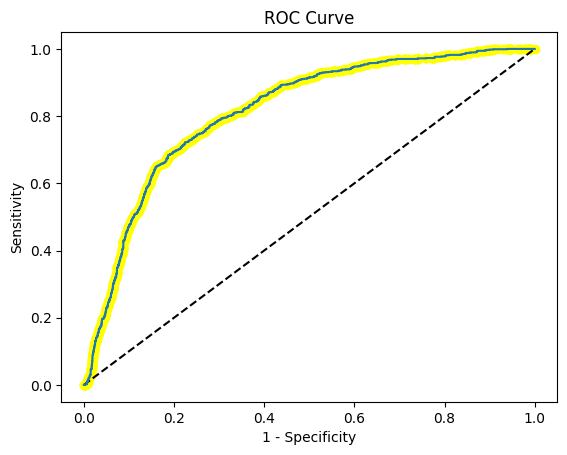

% of Area Under Curve (AUC) is :  81.30914710427551


In [142]:
m1spec, senc, thresholds = roc_curve(y_test, p_y_1)
plt.plot([0,1],[0,1],'k--')
plt.plot(m1spec,senc)
plt.scatter(m1spec,senc,c='yellow')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.show()

print("% of Area Under Curve (AUC) is : ",roc_auc_score(y_test, p_y_1)*100)